<a href="https://colab.research.google.com/github/master1223347/Assorted-ML-Projects/blob/main/Notebook4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions

For this assignment, you will use the Penguins dataset to compare Support Vector Machine (SVM) and Decision Tree classifiers. Complete all code cells following the provided instructions.

**Do not delete any instructor-provided cells from this Notebook.** If you accidentally delete a cell, you can either undo the action or load a copy of the original assignment Notebook in a new browser tab and copy over the missing cells.

**You can add cells to this Notebook.** To add a markdown (text) cell, hover your cursor beneath the cell where you want to insert and click the "+Text" button. To add a Python (code) cell, click the "+Code" button.

### Steps
- Load and explore the Penguins dataset.
- Prepare the data by removing null values and splitting into training and test sets.
- Build SVM and Decision Tree classifiers to predict categorical features using only numerical features.
- Experiment with regularization hyperparameters for both models.
- Compare model performance and report findings about which classifier performed best for different prediction tasks.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree

The following variable will be used to set a random seed for certain processes. Using a seed makes random processes deterministic, meaning this notebook will do things like split data the same way on each run.

You are free to change this value to explore how the notebook runs differently.

In [ ]:
seed = 42

## Load the Dataset

The Penguins dataset was collected by the Palmer Station, Antarctica Long-Term Ecological Research program. It comprises measurements from three penguin species - Adelie, Gentoo, and Chinstrap - living on islands in the Palmer Archipelago, Antarctica.

### Features
- **bill_length_mm**: Length of the penguin's bill in millimeters.
- **bill_depth_mm**: Depth of the penguin's bill in millimeters.
- **flipper_length_mm**: Length of the penguin's flipper in millimeters.
- **body_mass_g**: Body mass of the penguin in grams.

### Categorical Variables
- **species**: The species of penguin (Adelie, Gentoo, Chinstrap).
- **island**: The island where the penguin was observed (Torgersen, Biscoe, Dream).
- **sex**: The sex of the penguin (Male, Female).
  - Note: This column will not be used for this assignment.

In [ ]:
df = sns.load_dataset("penguins").drop(columns="sex")
df.shape

(344, 6)

### Inspect the Data

Display the first few rows and check for missing values.

In [ ]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0


## Prepare the Data

Because we will be using two target vectors for the first time, most of the preparation steps have been completed for you.

### Remove Null Values

In [ ]:
df.isnull().sum()
df = df.dropna(ignore_index=True)
df.shape

(342, 6)

### Create a Feature Matrix

The feature matrix `X` should only contain numerical features.

In [ ]:
X = df.drop(columns=["island", "species"])
X.shape

(342, 4)

### Create Two Target Vectors

Later, you will perform two classification tasks with these targets.

In [ ]:
y_island = df["island"]
y_species = df["species"]
y_island.shape, y_species.shape

((342,), (342,))

### Split into Training and Test Sets

Split the data into training and test sets.

It is worth noting that `train_test_split` can take multiple matrices and vectors (that have the same number of samples) and will split each appropriately. When splitting many such objects, pay attention to the order that you pass them in to the split function, as that determines the order that they will be returned.

In [ ]:
test_size=0.2

In [ ]:
X_train, X_test, y_island_train, y_island_test, y_species_train, y_species_test = model_selection.train_test_split(
    X, y_island, y_species, test_size=test_size, random_state=seed
)
X_train.shape, y_island_train.shape, y_species_train.shape, \
  X_test.shape, y_island_test.shape, y_species_test.shape

((273, 4), (273,), (273,), (69, 4), (69,), (69,))

### Scale the Feature Matrix

SVMs require feature scaling. Use StandardScaler to scale the numerical features.

In [ ]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Visualize the Dataset

Create at least one visualization to explore relationships between numerical features. Use color to distinguish categories.

Although the use of Generative AI to write code for all other parts of assignments is discouraged, for visualizations - which are not strictly part of a machine learning curriculum - you may use Gemini or another LLM of your choice to write Matplotlib (or Seaborn) code, which may help you better explore the data.

**However, be sure you understand and explain any visualization that is part of your submission.**

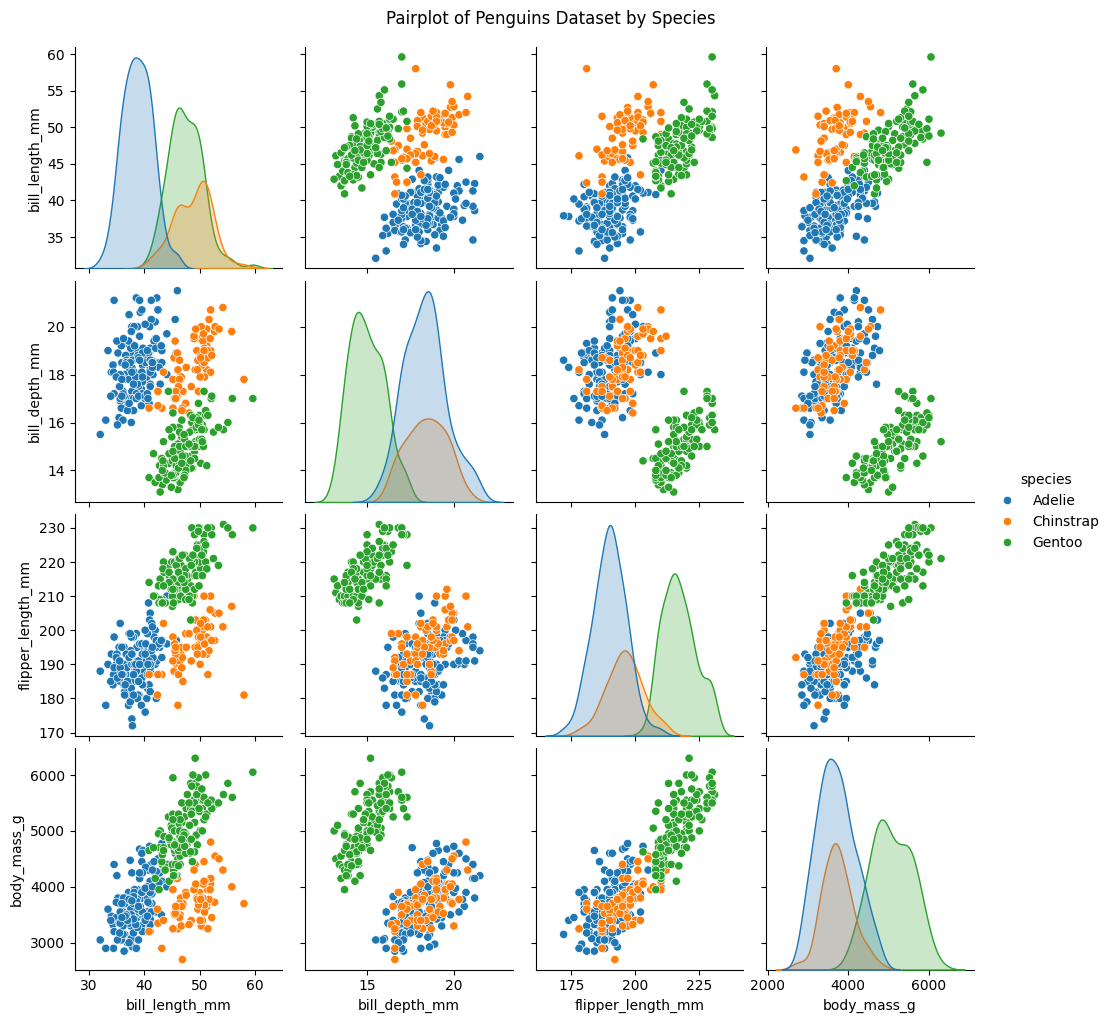

In [ ]:
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot of Penguins Dataset by Species", y=1.02)
plt.show()

This pairplot shows scatter plots for every combination of the numerical features with each point colored according to the penguin species. This helps visualize how the different species are separated based on these measurements

### Report Findings

Describe what your visualization(s) represent and what you observe.

The visualizations represent that the Adelie and Chinstrap penguins are more closely related than the Gentoo penguins, it might be harder to diffrentiate between both of them since a lot of their features overlap.

## Task 1: Predict Penguin Species

Use only the numerical features - `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` - to predict penguin species.

### Train an SVM Classifier

Train an SVM with an RBF kernel. Experiment with the C and gamma hyperparameters.
- C: Regularization parameter. Lower values create a softer margin.
- gamma: Kernel coefficient. Lower values create a broader decision boundary.

In [ ]:
svm_species = svm.SVC(kernel='rbf', random_state=seed)
svm_species.fit(X_train_scaled, y_species_train)

SVC(random_state=42)

### Evaluate the SVM

Make predictions on the test set and calculate accuracy.

In [ ]:
y_species_pred_svm = svm_species.predict(X_test_scaled)

accuracy_svm_species = metrics.accuracy_score(y_species_test, y_species_pred_svm)
accuracy_svm_species

0.9710144927536232

Display a confusion matrix for the SVM predictions.

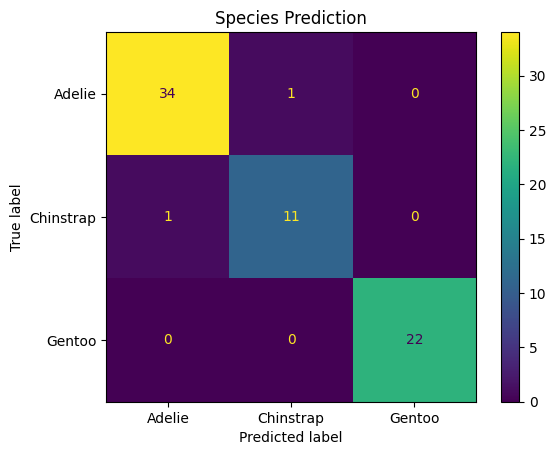

In [ ]:
cm_svm_species = metrics.confusion_matrix(y_species_test, y_species_pred_svm)
disp_svm_species = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_svm_species, display_labels=svm_species.classes_)
disp_svm_species.plot()
plt.title("Species Prediction")
plt.show()

### Train a Decision Tree Classifier

Train a Decision Tree using the Gini criterion. Experiment with `max_depth`, `min_samples_split`, `min_samples_leaf`, and `max_leaf_nodes` hyperparameters. (Since there are only 4 features, setting `max_features` may not be helpful.)

Note: Decision Trees do not require scaled features; you may use the original (unscaled) numerical features if you want to assess its performance on the original data.

In [ ]:
dt_species = tree.DecisionTreeClassifier(criterion='gini', random_state=seed)
dt_species.fit(X_train, y_species_train)

DecisionTreeClassifier(random_state=42)

### Display the Tree

Use `plot_tree` to display a diagram of the Decision Tree (see the Practice Notebook for an example).

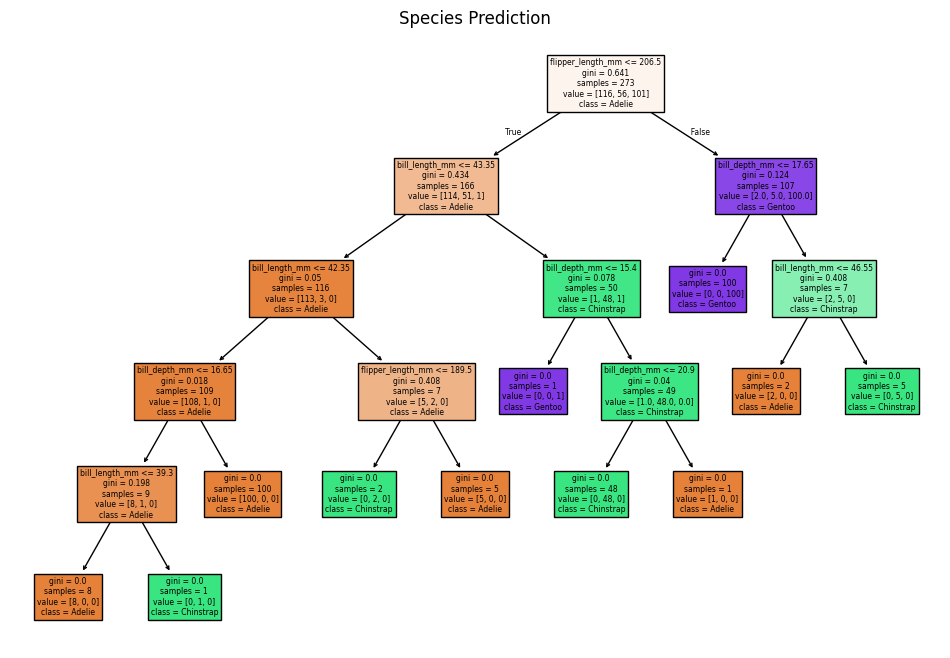

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_species, feature_names=X.columns, class_names=dt_species.classes_, filled=True)
plt.title("Species Prediction")
plt.show()

### Evaluate the Decision Tree

Make predictions on the test set and calculate accuracy.

In [ ]:
y_species_pred_dt = dt_species.predict(X_test)

accuracy_dt_species = metrics.accuracy_score(y_species_test, y_species_pred_dt)
accuracy_dt_species

0.9565217391304348

Display a confusion matrix for the Decision Tree predictions.

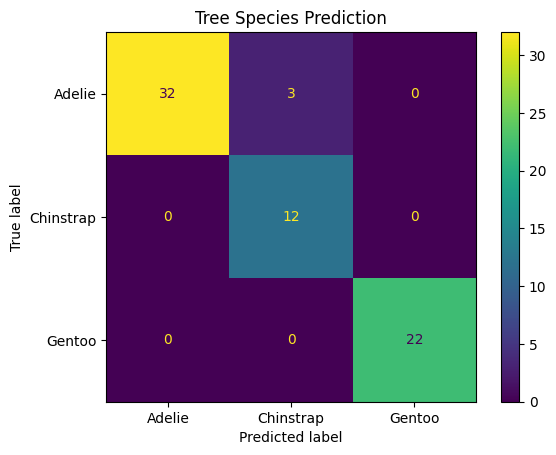

In [ ]:
cm_dt_species = metrics.confusion_matrix(y_species_test, y_species_pred_dt)
disp_dt_species = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_dt_species, display_labels=dt_species.classes_)
disp_dt_species.plot()
plt.title("Tree Species Prediction")
plt.show()

### Compare SVM and Decision Tree for Species Prediction

Which model performed better? Why do you think this is the case based on the data and the nature of each algorithm?

The SVM model performed slightly better because the data is more linear in this dataset which SVMs perform better on.

## Task 2: Predict Penguin Island

Now use the same numerical features to predict which island each penguin is from.

### Train an SVM Classifier

Train an SVM to predict island. Try different values for C and gamma.

In [ ]:
svm_island = svm.SVC(kernel='rbf', random_state=seed)
svm_island.fit(X_train_scaled, y_island_train)

SVC(random_state=42)

### Evaluate the SVM

Make predictions on the test set and calculate accuracy.

In [ ]:
y_island_pred_svm = svm_island.predict(X_test_scaled)

accuracy_svm_island = metrics.accuracy_score(y_island_test, y_island_pred_svm)
accuracy_svm_island

0.6376811594202898

Display a confusion matrix for the SVM predictions.

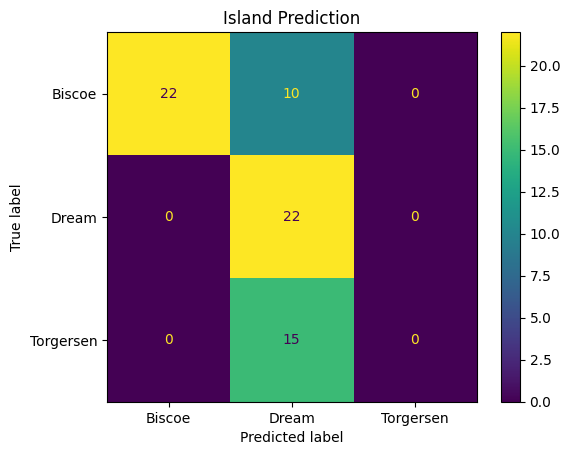

In [ ]:
cm_svm_island = metrics.confusion_matrix(y_island_test, y_island_pred_svm)
disp_svm_island = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_svm_island, display_labels=svm_island.classes_)
disp_svm_island.plot()
plt.title("Island Prediction")
plt.show()

### Train a Decision Tree Classifier

Train a Decision Tree to predict island. Experiment with hyperparameters.

In [ ]:
dt_island = tree.DecisionTreeClassifier(criterion='gini', random_state=seed)
dt_island.fit(X_train, y_island_train)

DecisionTreeClassifier(random_state=42)

### Display the Tree

Use `plot_tree` to display a diagram of the Decision Tree.

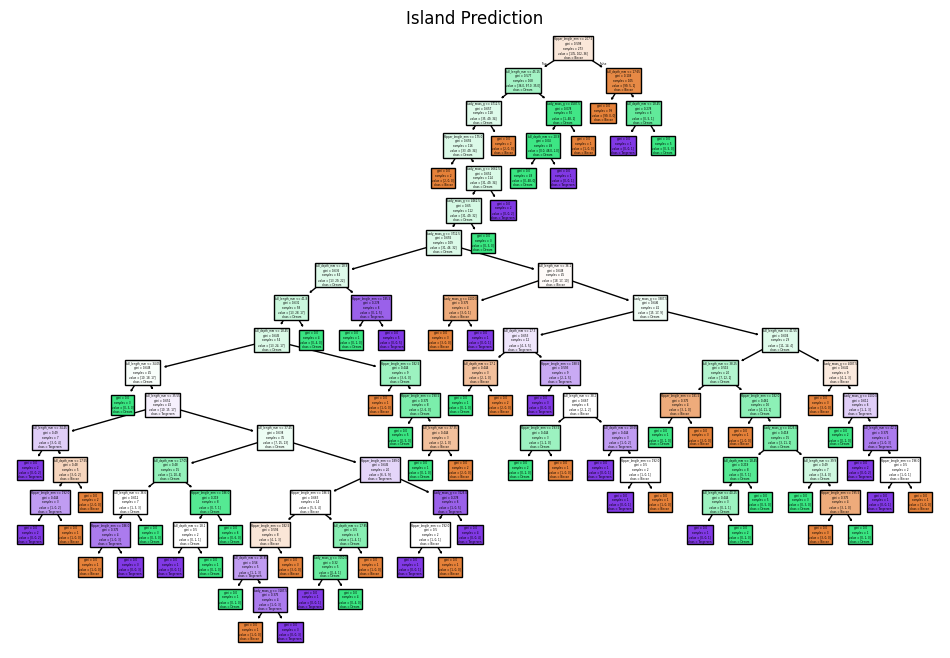

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_island, feature_names=X.columns, class_names=dt_island.classes_, filled=True)
plt.title("Island Prediction")
plt.show()

### Evaluate the Decision Tree

Make predictions on the test set and calculate accuracy.

In [ ]:
y_island_pred_dt = dt_island.predict(X_test)

accuracy_dt_island = metrics.accuracy_score(y_island_test, y_island_pred_dt)
accuracy_dt_island

0.6956521739130435

Display a confusion matrix for the Decision Tree predictions.

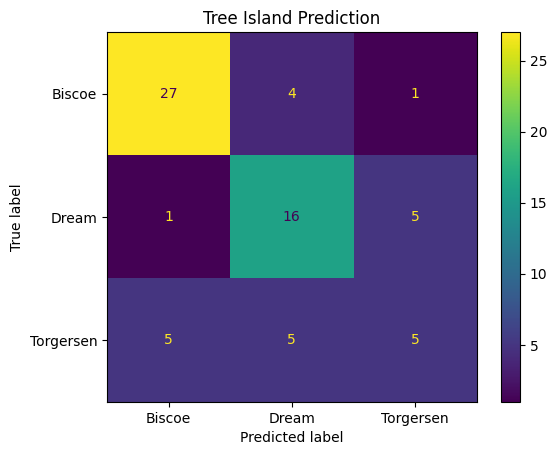

In [ ]:
cm_dt_island = metrics.confusion_matrix(y_island_test, y_island_pred_dt)
disp_dt_island = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_dt_island, display_labels=dt_island.classes_)
disp_dt_island.plot()
plt.title("Tree Island Prediction")
plt.show()

### Compare SVM and Decision Tree for Island Prediction

Which model performed better? Why do you think this is the case?

The decision tree model performed bettwen than the SVM model. Both of them struggled with the same set of islands, the Torgersen and Biscoe islands, but the decision tree had fewer overall misclassifications. The variance could be due to the type of data we gave it. The relationship between the islands were more complex and less linear, which decision trees perform better on.

## Experiment with Regularization

Try different hyperparameter values with your SVM and Decision Tree models. Some values you might want to try are listed below; you only need to pick a few that represent a good range of possibilities, based on your previous observations and your understanding of regularization for each model type.

### For SVMs:
- Try C values: 0.1, 1.0, 10.0, 100.0
- Try gamma values: "scale", "auto", 0.001, 0.01, 0.1

### For Decision Trees:
- Try max_depth values: 2, 3, 5, 10, None
- Try min_samples_split values: 2, 5, 10, 20
- Try min_samples_leaf values: 1, 2, 5, 10
- Try max_leaf_nodes values: None, 10, 20, 50

Record the accuracy for a few different combinations and identify which hyperparameters work best for each task in the section below.

In [ ]:
C_values = [0.1, 1.0, 10.0, 100.0]
gamma_values = ["scale", "auto", 0.001, 0.01, 0.1]

best_accuracy_species_svm = 0
best_params_species_svm = {}

for c in C_values:
    for gamma in gamma_values:
        svm_species = svm.SVC(C=c, gamma=gamma, kernel='rbf', random_state=seed)
        svm_species.fit(X_train_scaled, y_species_train)
        y_species_pred_svm = svm_species.predict(X_test_scaled)
        accuracy = metrics.accuracy_score(y_species_test, y_species_pred_svm)

        print(f"C: {c}, gamma: {gamma}, Accuracy: {accuracy:.4f}")

        if accuracy > best_accuracy_species_svm:
            best_accuracy_species_svm = accuracy
            best_params_species_svm = {'C': c, 'gamma': gamma}

print(f"\nBest hyperparameters for SVM species prediction: {best_params_species_svm}")
print(f"Best accuracy for SVM species prediction: {best_accuracy_species_svm:.4f}")

In [ ]:
max_depth_values = [2, 3, 5, 10, None]
min_samples_split_values = [2, 5, 10, 20]
min_samples_leaf_values = [1, 2, 5, 10]
max_leaf_nodes_values = [None, 10, 20, 50]

best_accuracy_species_dt = 0
best_params_species_dt = {}

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            for max_leaf_nodes in max_leaf_nodes_values:
                dt_species = tree.DecisionTreeClassifier(
                    criterion='gini',
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    max_leaf_nodes=max_leaf_nodes,
                    random_state=seed
                )
                dt_species.fit(X_train, y_species_train)
                y_species_pred_dt = dt_species.predict(X_test)
                accuracy = metrics.accuracy_score(y_species_test, y_species_pred_dt)

                print(f"max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, max_leaf_nodes: {max_leaf_nodes}, Accuracy: {accuracy:.4f}")

                if accuracy > best_accuracy_species_dt:
                    best_accuracy_species_dt = accuracy
                    best_params_species_dt = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_leaf_nodes': max_leaf_nodes
                    }

print(f"\nBest hyperparameters for Decision Tree species prediction: {best_params_species_dt}")
print(f"Best accuracy for Decision Tree species prediction: {best_accuracy_species_dt:.4f}")

### Report Regularization Findings

Summarize which hyperparameters worked best for:
1. SVM predicting species
2. Decision Tree predicting species
3. SVM predicting island
4. Decision Tree predicting island

Briefly explain why you think certain hyperparameters performed better. Your answer need only be based on your current understanding of these models and their hyperparameters, even if that understanding is limited. Thoughtfulness is more important than correctness here.

SVM worked better for predicting species, while Decision Trees did better for predicting islands. The species data was easier to separate, so SVM’s boundaries fit well. Island data was more complex, so the deeper Decision Tree handled it better. Overall, SVMs are great for clear patterns, and Trees shine with messy ones. Regularization helped both avoid overfitting and stay accurate on new data.

## Final Summary

Reflect on the overall comparison between SVMs and Decision Trees on the Penguins dataset.

### Questions to Address:
1. Which classifier (SVM or Decision Tree) performed best for each task? Was there one that performed best overall?
2. Based on your understanding of how SVMs and Decision Trees work, why do you think you observed these results?
3. What role did regularization play in improving model performance, if any?

Classifier Performance: The SVM performed best for predicting species, while the Decision Tree performed best for predicting islands. Neither model was best overall since each excelled in a different task.

Reason for Results: SVMs work well when data has clear, separable patterns, which fits the species data. Decision Trees handle more complex or overlapping data better, which explains their stronger performance on the island prediction.

Role of Regularization: Regularization helped both models avoid overfitting. In SVMs, adjusting C and gamma balanced the flexibility of the decision boundary. In Decision Trees, controlling depth and splits kept the model simpler and more accurate on new data.